In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
image_as_array = mpimg.imread('/content/drive/MyDrive/DATA/palm_trees.jpg')


In [8]:
image_as_array.shape #(H,W,C)

(1401, 934, 3)

In [9]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

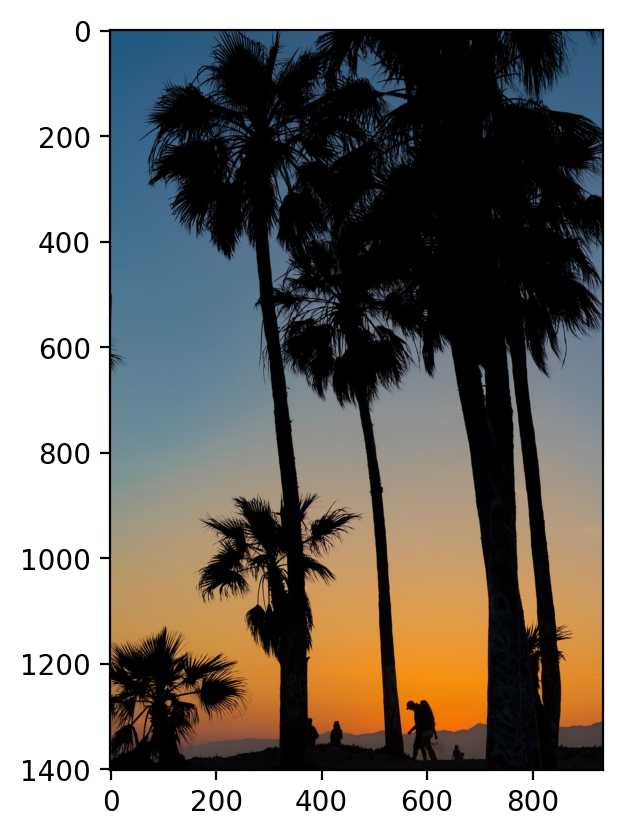

In [11]:
plt.figure(dpi=200)
plt.imshow(image_as_array)

In [12]:
#(H,W,C) ---> 2D (H*W,C)

In [14]:
(h,w,c) =  image_as_array.shape

In [15]:
c

3

In [18]:

image_as_array2d =  image_as_array.reshape(h*w,c)

In [20]:
len(image_as_array2d.shape)

2

In [21]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters =6)

In [25]:
labels = model.fit_predict(image_as_array2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
labels

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [28]:
rgb_codes  = model.cluster_centers_.round(0).astype(int)

In [29]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 68,  62,  62],
       [ 71, 109, 138],
       [192, 154, 109]])

In [33]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

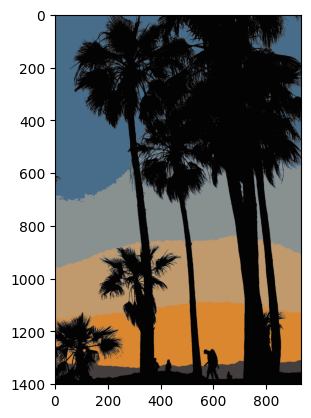

In [34]:
plt.imshow(quantized_image)